# <font color=blue>Assignments for "Data Exploration - Multivariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
students = pd.read_csv("E:/user/Notebooks/data/StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


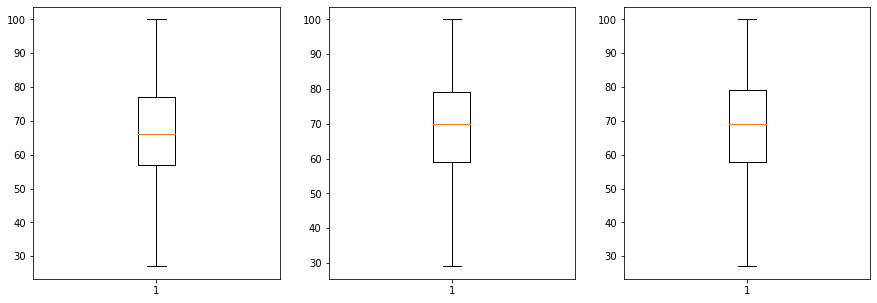

In [47]:
from scipy.stats.mstats import winsorize
import numpy as np
students['math score']= winsorize(np.array(students['math score'].dropna()), (0.008, 0))
students['reading score']=winsorize(np.array(students['reading score'].dropna()), (0.006, 0))
students['writing score']=winsorize(np.array(students['writing score'].dropna()), (0.005, 0))
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.boxplot(students['math score'])

plt.subplot(1,3,2)
plt.boxplot(students['reading score'])

plt.subplot(1,3,3)
plt.boxplot(students['writing score'])

plt.show()

**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [48]:

students['average score']=(students['math score']+students['reading score']+students['writing score'])/3

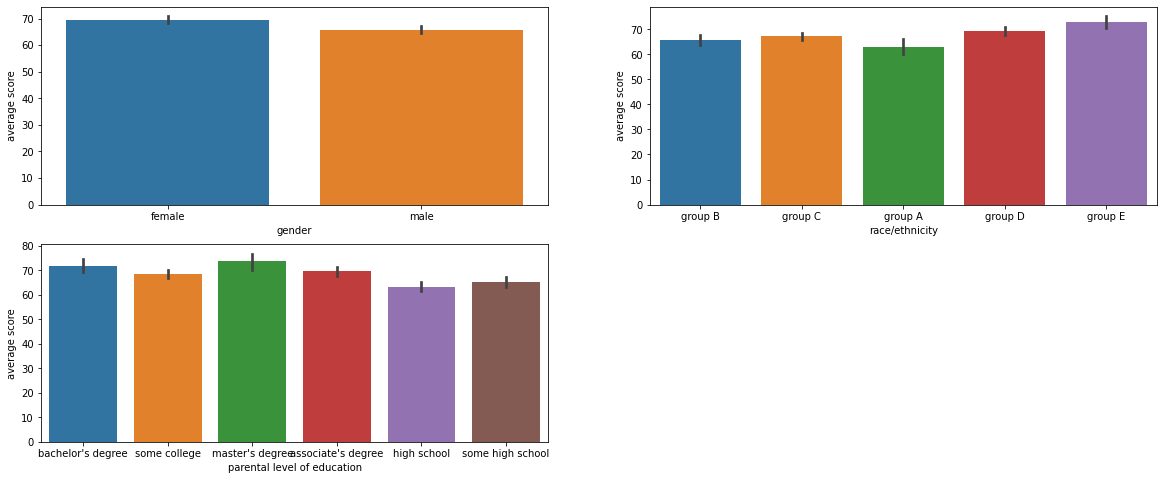

In [49]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.barplot(x = 'gender', y = 'average score', data = students)
plt.subplot(2,2,2)
sns.barplot(x = 'race/ethnicity', y = 'average score', data = students)
plt.subplot(2,2,3)
sns.barplot(x = 'parental level of education', y = 'average score', data = students)

females more succesfull , students from ethnicity of group E is more successfull and students that have the parents who have high level education is more succesfull

**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

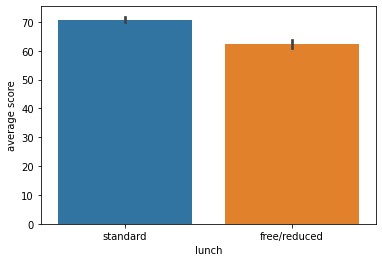

In [50]:
sns.barplot(x = 'lunch', y = 'average score', data = students)

In [53]:
lunch =students["lunch"].unique()
group = students.groupby("lunch")

In [54]:
pd.options.display.float_format = '{:.15f}'.format
for var in ['math score','reading score','writing score']:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(lunch)):
        for j in range(i+1, len(lunch)):
            ttest = stats.ttest_ind(students[students["lunch"]==lunch[i]][var], 
                                students[students["lunch"]==lunch[j]][var])
            group_1 = lunch[i]
            group_2 = lunch[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.833770286241137,0.000000000000000


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.416384984154218,0.000000000000257


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.971849225146030,0.000000000000004


according to ttest lunch and exam score are related to each other.

**(3)** Does the preparation courses have an impact on exam performance?

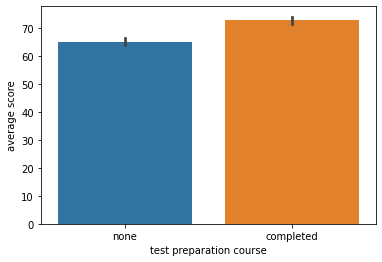

In [39]:
sns.barplot(x = 'test preparation course', y = 'average score', data = students)

In [58]:
prep =students['test preparation course'].unique()
group = students.groupby('test preparation course')

In [60]:
pd.options.display.float_format = '{:.15f}'.format
for var in ['math score','reading score','writing score']:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(prep)):
        for j in range(i+1, len(prep)):
            ttest = stats.ttest_ind(students[students['test preparation course']==prep[i]][var], 
                                students[students['test preparation course']==prep[j]][var])
            group_1 = prep[i]
            group_2 = prep[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,none,completed,-5.692029799391047,0.000000016497247


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,none,completed,-7.870411917143238,0.000000000000009


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,none,completed,-10.434513790334764,0.000000000000000


**(4)** Which lessons are most correlated with each other?

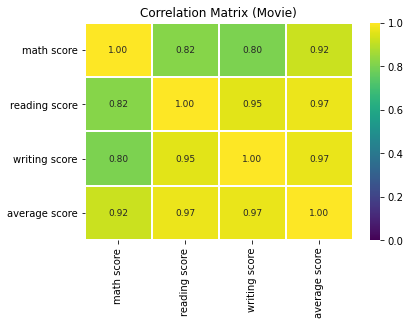

In [40]:
s_corr=students.corr()
sns.heatmap(s_corr, annot=True, fmt='.2f', annot_kws={"size": 9}, linewidths=.8, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)")

plt.show()

reading and writing are most correlated